# Visualise and Analyse Final Dataset

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

import statsmodels.formula.api as smf

The lastest year with most data available is **2014**. Whenever a year is to be chosen, analysis will be conducted for  this year. Will use a range if it is necessary to generalise, acquire more results, this is another reason that a variable is used instead of hard coding.

In [3]:
magic_year = 2014

In [4]:
ds = pd.read_csv("project_data.csv")

ds.head()

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score
0,Aruba,ABW,2011,25324.720363,NaN,NaN
1,Afghanistan,AFG,2011,603.537023,NaN,2.48
2,Angola,AGO,2011,4299.012889,5.13,3.32
3,Albania,ALB,2011,4437.178068,7.25,5.81
4,Andorra,AND,2011,40919.183279,NaN,NaN


In [5]:
ds.columns

Index([u'Country Name', u'Country Code', u'Year', u'GDP',
       u'Economic Freedom Index', u'Democracy Score'],
      dtype='object')

## Visualise and Describe Democracy, GDP, and a Financial Liberties values for a single year

### GDP

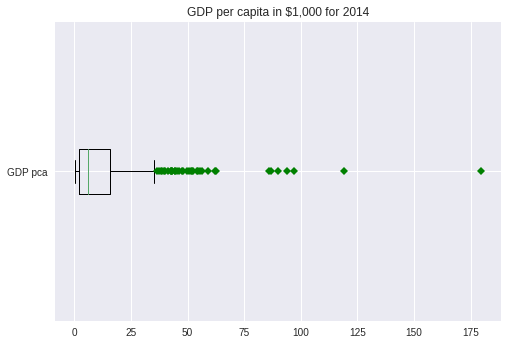

In [15]:
gdp_data = ds[ds['Year'] == magic_year]['GDP'].dropna()

# gdp_data

plt.figure()
plt.boxplot([gdp_data / 1000], 0, 'gD', 0, labels=["GDP pca"])
plt.title("GDP per capita in $1,000 for %s" % magic_year)
plt.show()

In [16]:
gdp_data.describe()

count       241.000000
mean      14943.227276
std       22621.957175
min         312.748979
25%        1975.464707
50%        6268.692122
75%       15570.778922
max      179478.584828
Name: GDP, dtype: float64

In [17]:
gdp_data.var()

511752946.42348933

In [18]:
kgdp = map(int, gdp_data / 1000)
# print(kgdp)
mode(kgdp)

ModeResult(mode=array([1]), count=array([34]))

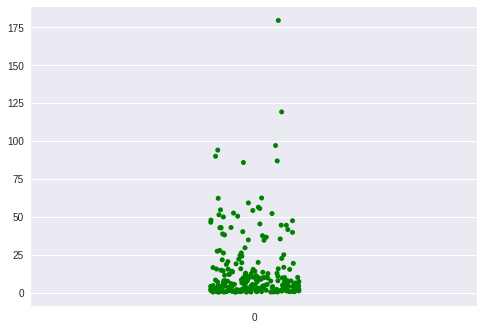

In [19]:
sns.stripplot(data=(gdp_data.values / 1000), jitter=True, color="g")

### Economic Freedom

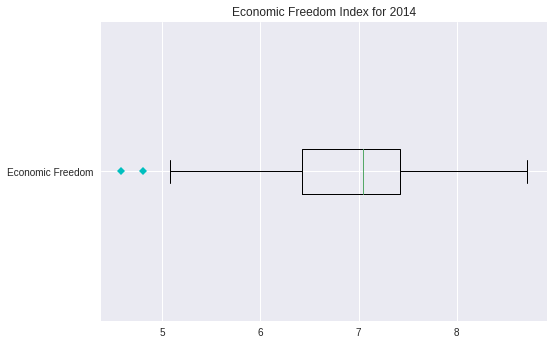

In [20]:
economic_freedom = ds[ds['Year'] == magic_year]['Economic Freedom Index'].dropna()

# econ_freedom_data

plt.figure()
plt.boxplot([economic_freedom], 0, 'cD', 0, labels=["Economic Freedom"])
plt.title("Economic Freedom Index for %s" % magic_year)
plt.show()

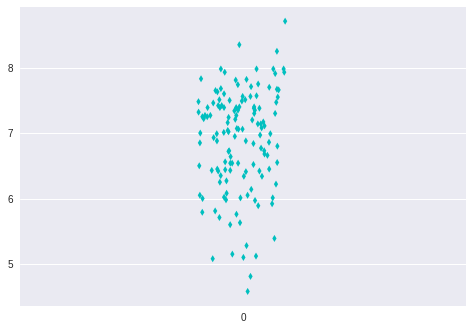

In [22]:
sns.stripplot(data=economic_freedom.values, jitter=True, color="c", marker="d")

In [23]:
economic_freedom.describe()

count    137.000000
mean       6.889343
std        0.783723
min        4.580000
25%        6.420000
50%        7.040000
75%        7.420000
max        8.710000
Name: Economic Freedom Index, dtype: float64

In [24]:
economic_freedom.var()

0.6142223593817091

In [25]:
economic_freedom_ints = map(int, economic_freedom)
# print(economic_freedom_ints)
mode(economic_freedom_ints)

ModeResult(mode=array([7]), count=array([69]))

## Civil Freedom

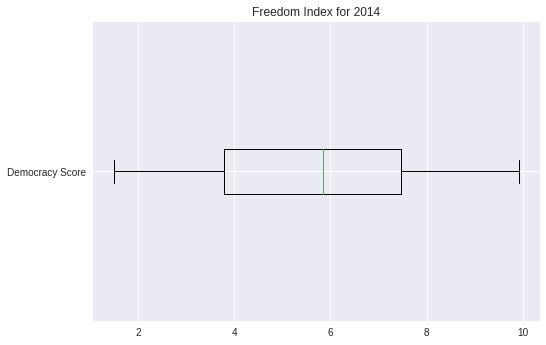

In [28]:
civil_freedom = ds[ds['Year'] == magic_year]['Democracy Score'].dropna()

# civil_freedom_data

plt.figure()
plt.boxplot([civil_freedom], 0, 'bD', 0, labels=["Democracy Score"])
plt.title("Freedom Index for %s" % magic_year)
plt.show()

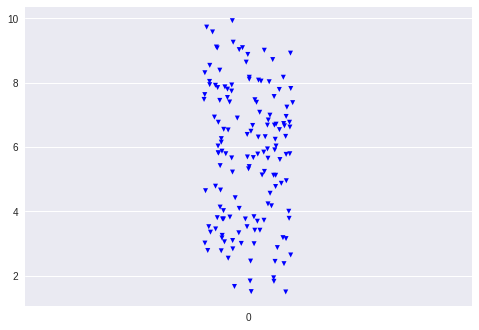

In [29]:
sns.stripplot(data=civil_freedom.values, jitter=True, color="b", marker="v")

In [30]:
civil_freedom.describe()

count    147.000000
mean       5.719728
std        2.113611
min        1.490000
25%        3.790000
50%        5.840000
75%        7.460000
max        9.930000
Name: Democracy Score, dtype: float64

In [31]:
civil_freedom.var()

4.467350610381141

In [32]:
civil_freedom_ints = map(int, civil_freedom)
# print(civil_freedom_ints)
mode(civil_freedom_ints)

ModeResult(mode=array([6]), count=array([27]))

## Visualise relationships

In [34]:
df_viz1 = ds.dropna()

# Per usual divide GDP w. 1000
df_viz1['GDP'] = df_viz1['GDP'] / 1000

df_viz1.head()

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score
2,Angola,AGO,2011,0.004299,5.13,3.32
3,Albania,ALB,2011,0.004437,7.25,5.81
7,Argentina,ARG,2011,0.012727,5.67,6.84
8,Armenia,ARM,2011,0.003527,7.71,4.09
11,Australia,AUS,2011,0.062245,7.93,9.22


/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


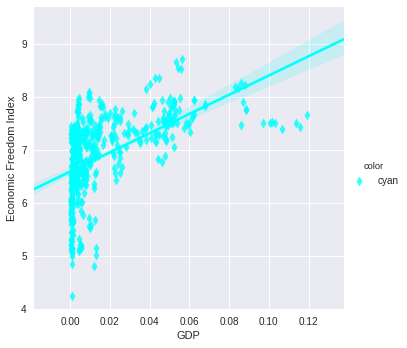

In [36]:
df_viz1['color'] = 'cyan'

sns.lmplot('GDP', 'Economic Freedom Index', df_viz1, line_kws={'color': 'cyan'}, markers=["d"],
           hue="color", palette=dict(cyan="cyan"))

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


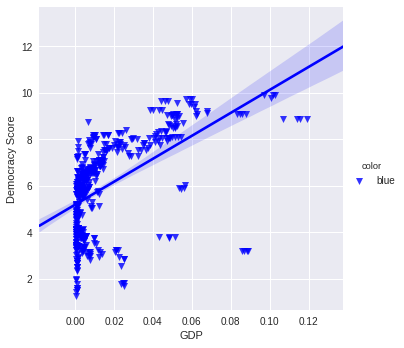

In [37]:
df_viz1['color'] = 'blue'

sns.lmplot('GDP', 'Democracy Score', df_viz1,
           line_kws={'color': 'blue'}, markers=["v"],
           hue="color", palette=dict(blue="blue"))

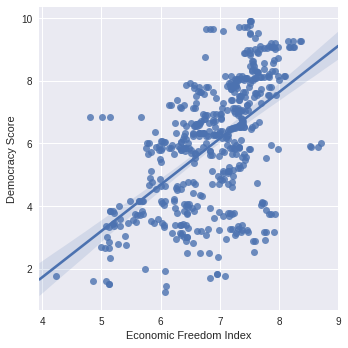

In [38]:
sns.lmplot('Economic Freedom Index', 'Democracy Score', df_viz1)

### Correlation Heatmap

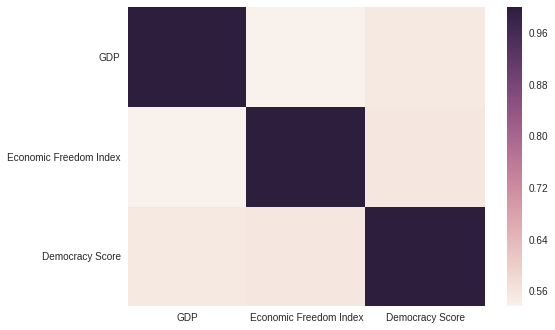

In [39]:
correlations = df_viz1[['GDP', 'Economic Freedom Index', 'Democracy Score']].corr()
sns.heatmap(correlations)

## Relationships summaries

In [52]:
df_ = df_viz1.rename(columns={
    'Economic Freedom Index': 'EconomicFreedomIndex',
    'Democracy Score': 'DemocracyScore'
})

lm = smf.ols(formula='GDP ~ EconomicFreedomIndex + DemocracyScore', data=df_).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 22 Aug 2017   Prob (F-statistic):           1.93e-53
Time:                        11:54:34   Log-Likelihood:                 1333.8
No. Observations:                 509   AIC:                            -2662.
Df Residuals:                     506   BIC:                            -2649.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0761      0.007    -10.236      0.000      -0.091      -0.061
EconomicFreedomIndex     0.0098      0.001      7.883      0.000       0.007       0.012
DemocracyScore           0.0041      0.000      8.695      0.000       0.003       0.005
==============================================================================
Omnibus:                      207.274   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.816
Skew:                           1.841   Prob(JB):                    1.18e-182
Kurtosis:                       8.094   Cond. No.                         89.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""